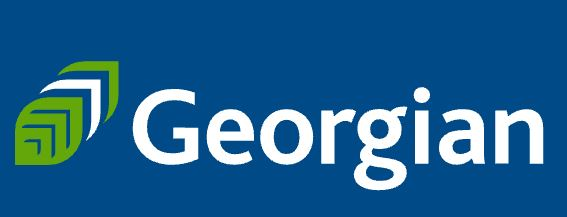

# Data Programming
# Problem Set 3
## Jhoana Patricia Romero Leiton
## Student number: 200493062


# Question 1

Here I will use the folowing [Github link](https://github.com/justmarkham)

### Step 1:

Import the necessary libraries

**Solution:**

In [136]:
import pandas as pd
import numpy as np

### Step 2 and 3:

Import the dataset from this [adress](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user) and assign it to a variable called users

**Solution:**

In [137]:
users = pd.read_csv(r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', sep='\t')
users = users.rename(columns={'user_id|age|gender|occupation|zip_code': 'temp'}, index={'ONE': 'Row_1'})

users[['user_id', 'age', 'gender', 'occupation', 'zip_code']] = users.temp.str.split("|", expand = True)

users.drop(columns =['temp'], inplace = True)

users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


### Step 4:

Discover what is the mean age per occupation

**Solution:**

In [138]:
#converting string data into int
users['age'] = users['age'].astype(int) 

#grouping by occupation to filter the data
users.groupby('occupation').mean()  

,age
occupation,
administrator,38.746835
artist,31.392857
doctor,43.571429
educator,42.010526
engineer,36.388060
entertainment,29.222222
executive,38.718750
healthcare,41.562500
homemaker,32.571429


### Step 5: 

Discover the Male ratio per occupation and sort it from the most to the least

**Solution:**

In [139]:
#First, I create a column "is_Male" which it will check if each person is Male, it will assign 1, or zero otherwise.
users['is_Male']= np.where(users.gender == 'M', 1, 0)

# Male ratio is equal to the number of male of each ocuppation divided by total number of people of each occupation (female and male)

(users.groupby('occupation').is_Male.sum()/users.groupby('occupation').gender.count()).sort_values(ascending = False).round(2)

occupation
doctor           1.00
engineer         0.97
technician       0.96
retired          0.93
programmer       0.91
executive        0.91
scientist        0.90
entertainment    0.89
lawyer           0.83
salesman         0.75
educator         0.73
student          0.69
other            0.66
marketing        0.62
writer           0.58
none             0.56
administrator    0.54
artist           0.54
librarian        0.43
healthcare       0.31
homemaker        0.14
dtype: float64

### Step 6: 

For each occupation, calculate the minimum and maximum ages

**Solution:**

In [13]:
users.groupby(['occupation']).min('age').head()

,age
occupation,
administrator,21
artist,19
doctor,28
educator,23
engineer,22


In [14]:
users.groupby(['occupation']).max('age').head()

,age
occupation,
administrator,70
artist,48
doctor,64
educator,63
engineer,70


### Step 7:

For each combination of occupation and sex, calculate the mean age

**Solution:**

In [15]:
users.groupby(['occupation','gender']).mean().head()

age
occupation    gender           
administrator F       40.638889
              M       37.162791
artist        F       30.307692
              M       32.333333
doctor        M       43.571429

### Step 8:

For each occupation present the percentage of women and men

**Solution:**

In [30]:
Per = users.pivot_table(index='occupation', columns='gender',  aggfunc='size', fill_value=0)
sumFM = Per[['F', 'M']].sum(axis=1)
Per['% of Male'] = (100 * Per['M'])/sumFM
Per['% of Male'] = Per['% of Male'].round(decimals=2)    
Per['% of Female'] = (100 * Per['F'])/sumFM
Per['% of Female'] = Per['% of Female'].round(decimals=2)  

#drop extra columns F and M
Per.drop(columns =['F'], inplace = True)
Per.drop(columns =['M'], inplace = True)

Per.sort_values(by='% of Male', ascending=False).head()

gender,% of Male,% of Female
occupation,,
doctor,100.00,0.00
engineer,97.01,2.99
technician,96.30,3.70
retired,92.86,7.14
programmer,90.91,9.09


# Question 2:

Euro teams

### Step 1:

Import the necessary libraries

**Solution:**

In [31]:
import pandas as pd
import numpy as np

### Step 2 and 3:

Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_&_Sorting/Euro12/Euro_2012_stats_TEAM.csv) and assign it to a variable called euro12

**Solution:**

In [34]:
euro12 = pd.read_csv(r'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


### Step 4:

Select only the Goal column

**Solution:**

In [36]:
euro12['Goals'].head()

0    4
1    4
2    4
3    5
4    3
Name: Goals, dtype: int64

### Step 5:

How many team participated in the Euro2012?

**Solution:**

In [38]:
euro12['Team'].count()

16

### Step 6: 

What is the number of columns in the dataset?

**Solution:**

In [39]:
len(euro12.columns)

35

### Step 7: 

View only the columns Team, Yellow Cards and Red Cards and assign them
to a dataframe called discipline

**Answer:**

In [45]:
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]

discipline.head()

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0


### Step 8: 

Sort the teams by Red Cards, then to Yellow Cards

**Answer:**

In [46]:
indexed_euro12 = euro12.set_index('Team')
indexed_euro12.sort_values(by=['Red Cards', 'Yellow Cards']).head()

,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,Headed goals,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
Team,,,,,,,,,,,,,,,,,,,,,
Denmark,4,10,10,50.0%,20.0%,27,1,0,0,3,...,10,66.7%,25,38,8,4,0,7,7,15
Germany,10,32,32,47.8%,15.6%,80,2,1,0,2,...,10,62.6%,63,49,12,4,0,15,15,17
England,5,11,18,50.0%,17.2%,40,0,0,0,3,...,22,88.1%,43,45,6,5,0,11,11,16
Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
Ukraine,2,7,26,21.2%,6.0%,38,0,0,0,2,...,13,76.5%,48,31,4,5,0,9,9,18


### Step 9:

Calculate the mean Yellow Cards given per Team

**Answer:**

*The mean is 7.4375*

In [47]:
euro12['Yellow Cards'].mean()

7.4375

### Step 10:

Filter teams that scored more than 6 goals

**Answer:**

In [49]:
euro12[(euro12['Goals']>6)]


,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


### Step 11: 

Select the teams that start
with G

**Answer:**

In [50]:
euro12[(euro12['Team'].str.startswith('G'))]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


### Step 12:

Select the first 7 columns

**Answer:**

In [51]:
euro12[euro12.columns[0:7]].head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65


### Step 13:

Select all columns except the last 3

**Answer:**

In [53]:
euro12[euro12.columns[0:-3]].head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0


### Step 14:

Present only the Shooting Accuracy from England, Italy and Russia

**Answer:**

In [55]:
newbar = euro12[(euro12['Team'].str.contains('England|Italy|Russia'))]
newbar[['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


# Question 3

Housing

### Step 1. 

Import the necessary libraries

**Answer:**

In [277]:
import pandas as pd
import numpy as np

### Step 2. Create 3 differents Series, each of length 100, as follows:

- The first a random number from 1 to 4
- The second a random number from 1 to 3
- The third a random number from 10,000 to 30,000

In [278]:
s1 = pd.Series(np.random.randint(1,5, size=100), name = 's1')
print(s1)

s2 = pd.Series(np.random.randint(1,4, size=100), name = 's2')
print(s2)

s3 = pd.Series(np.random.randint(10000,30001, size=100),name = 's3')
print(s3)

0     2
1     1
2     3
3     1
4     2
     ..
95    3
96    4
97    4
98    2
99    4
Name: s1, Length: 100, dtype: int32
0     3
1     2
2     2
3     2
4     3
     ..
95    3
96    2
97    2
98    3
99    1
Name: s2, Length: 100, dtype: int32
0     22518
1     19543
2     10285
3     23276
4     20492
      ...  
95    11529
96    29361
97    11462
98    17386
99    17371
Name: s3, Length: 100, dtype: int32


### Step 3. 

Create a DataFrame by joinning the Series by column

**Answer:**

In [279]:
DF = pd.concat([s1, s2, s3], axis = 1)

DF.head()

,s1,s2,s3
0,2,3,22518
1,1,2,19543
2,3,2,10285
3,1,2,23276
4,2,3,20492


### Step 4.

Change the name of the columns to bedrs, bathrs, price_sqr_meter

**Answer:**

In [280]:
DF.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
DF.head()

,bedrs,bathrs,price_sqr_meter
0,2,3,22518
1,1,2,19543
2,3,2,10285
3,1,2,23276
4,2,3,20492


### Step 5. 

Create a one column DataFrame with the values of the 3 Series and assign it
to *bigcolumn*

**Answer:**

In [281]:
bigcolumn = pd.DataFrame(columns = ['bigcolumn'])
bigcolumn['bigcolumn'] = DF[DF.columns[0:]].apply(lambda x: ', '.join(x.astype(str)),axis=1)
bigcolumn.head()

,bigcolumn
0,"2, 3, 22518"
1,"1, 2, 19543"
2,"3, 2, 10285"
3,"1, 2, 23276"
4,"2, 3, 20492"


### Step 6. 

Ops it seems it is going only until index 99. Is it true?

**Answer:**

 It is true because of the last step (step 5).

### Step 7. 

Reindex the DataFrame so it goes from 0 to 299

**Answer:**

In [282]:
bigcolumn['bigcolumn'] = bigcolumn['bigcolumn'].astype(str)
bigcolumn = bigcolumn.drop('bigcolumn', axis=1).join(bigcolumn['bigcolumn'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).rename('bigcolumn'))
bigcolumn = bigcolumn.reset_index(drop=True)
bigcolumn.head()


,bigcolumn
0,2
1,3
2,22518
3,1
4,2


# Question 4

*Wind Statistics*

The data have been modified to contain some missing values, identified by *NaN*.
Using pandas should make this exercise easier, in particular for the bonus question.
You should be able to perform all of these operations without using a for loop or
other looping construct. The first three columns are year, month, and day. The remaining 12 columns are
average windspeeds in knots at 12 locations in Ireland on that day.

### Step 1.

 Import the necessary libraries
 
 **Answer:**

In [285]:
import pandas as pd
import numpy as np
import datetime

### Step 2.

Import the dataset from the attached file wind.txt

**Answer:**

In [286]:
data = pd.read_csv('wind.txt',sep="\s+")
data.head()

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


### Step 3.

Assign it to a variable called data and replace the first 3 columns by a proper
datetime index.

**Answer:**

In [287]:
data["Date"] = pd.to_datetime(data[["Yr","Mo","Dy"]].astype(str).agg('-'.join, axis=1))
data['Date'] = pd.to_datetime(data.Date) 
data.head()

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,Date
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,2061-01-01
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,2061-01-02
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,2061-01-03
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,2061-01-04
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,2061-01-05


In [288]:
data.set_index('Date',inplace=True)
data = data.drop(["Yr","Mo","Dy"], axis=1)
data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


### Step 4.

 Year 2061? Do we really have data from this year? Create a function to fix it
and apply it.

**Answer:**

In [289]:
data = pd.read_csv('wind.txt',sep="\s+")
data["Date"] = pd.to_datetime(data[["Yr","Mo","Dy"]].astype(str).agg('-'.join, axis=1))
data['Date'] = pd.to_datetime(data.Date) 
data["Date"] = np.where(pd.DatetimeIndex(data["Date"]).year < 2000,
data.Date,data.Date - pd.offsets.DateOffset(years=100))
data = data.drop(["Yr","Mo","Dy"], axis=1)
data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,Date
0,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961-01-01
1,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,1961-01-02
2,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,1961-01-03
3,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,1961-01-04
4,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,1961-01-05


### Step 5

 Set the right dates as the index. Pay attention at the data type, it should be
datetime64[ns]

**Answer:**

In [263]:
data.Date.dtype

dtype('<M8[ns]')

In [264]:
data.index.astype("datetime64[ns]")

DatetimeIndex([          '1970-01-01 00:00:00',
               '1970-01-01 00:00:00.000000001',
               '1970-01-01 00:00:00.000000002',
               '1970-01-01 00:00:00.000000003',
               '1970-01-01 00:00:00.000000004',
               '1970-01-01 00:00:00.000000005',
               '1970-01-01 00:00:00.000000006',
               '1970-01-01 00:00:00.000000007',
               '1970-01-01 00:00:00.000000008',
               '1970-01-01 00:00:00.000000009',
               ...
               '1970-01-01 00:00:00.000006564',
               '1970-01-01 00:00:00.000006565',
               '1970-01-01 00:00:00.000006566',
               '1970-01-01 00:00:00.000006567',
               '1970-01-01 00:00:00.000006568',
               '1970-01-01 00:00:00.000006569',
               '1970-01-01 00:00:00.000006570',
               '1970-01-01 00:00:00.000006571',
               '1970-01-01 00:00:00.000006572',
               '1970-01-01 00:00:00.000006573'],
              dtype=

### Step 6. 

Compute how many values are missing for each location over the entire
record.They should be ignored in all calculations below.

**Answer:**

*There are 31*

In [265]:
data.isnull().values.ravel().sum()

31

### Step 7.

Compute how many non-missing values there are in total.

**Answer:**

*There are 85431*

In [266]:
data.notnull().values.ravel().sum()

85431

### Step 8.

Calculate the mean windspeeds of the windspeeds over all the locations and
all the times.

**Answer:**

In [267]:
data.mean().mean()

<ipython-input-267-e9c1cd44013d>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data.mean().mean()


10.227982360836924

# Step 9. 

Create a DataFrame called loc_stats and calculate the min, max and mean
windspeeds and standard deviations of the windspeeds at each location over all the
days.

**Answer:**

In [268]:
loc_stats=data.agg(['min','max','mean','std']) 
loc_stats

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,Date
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000,1961-01-01 00:00:00
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000,1978-12-31 00:00:00
mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079,1969-12-31 12:00:00
std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794,1897 days 21:28:19.220597120


### Step 10. 

Create a DataFrame called day_stats and calculate the min, max and mean
windspeed and standard deviations of the windspeeds across all the locations at each
day.

**Answer:**

In [269]:
day_stats=data.apply(pd.DataFrame.describe, axis=1)
day_stats

,count,unique,top,freq
0,12.0,11.0,15.04,2.0
1,12.0,12.0,9.79,1.0
2,12.0,12.0,16.88,1.0
3,13.0,13.0,1.79,1.0
4,13.0,13.0,13.25,1.0
...,...,...,...,...
6569,13.0,13.0,1978-12-27 00:00:00,1.0
6570,13.0,13.0,5.0,1.0
6571,13.0,13.0,9.71,1.0
6572,13.0,13.0,12.46,1.0


### Step 11.

Find the average windspeed in January for each location.
Treat January 1961 and January 1962 both as January.

**Answer:**

In [270]:
data.set_index('Date', inplace=True)
jan_data = data[data.index.month == 1]
jan_data.mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

### Step 12

Downsample the record to a yearly frequency for each location

**Answer:**

In [271]:
data.groupby(data.index.to_period('A')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


### Step 13.

Downsample the record to a monthly frequency for each location

**Answer:**

In [272]:
data.groupby(data.index.to_period('M')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000
1961-04,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000


### Step 14.

Downsample the record to a weekly frequency for each location.

**Answer:**

In [273]:
data.groupby(data.index.to_period('W')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1960-12-26/1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
1961-01-02/1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571
1961-01-09/1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-16/1961-01-22,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286
1961-01-23/1961-01-29,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-11-27/1978-12-03,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571
1978-12-04/1978-12-10,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429
1978-12-11/1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857


### Step 15.

Calculate the min, max and mean windspeeds and standard deviations of the
windspeeds across all locations for each week (assume that the first week starts on
January 2 1961) for the first 52 weeks.

**Answer:**

In [274]:
new_df= data.groupby(data.index.to_period('W')).mean().apply(lambda x: [x.count(),x.min(),x.max(),x.mean(),x.std()])
new_df = new_df.rename( index={0: 'count',1: 'min',2: 'max',3: 'mean',4: 'std'})
new_df

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
count,940.000000,940.000000,940.000000,940.000000,939.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
min,3.874286,2.452857,4.901429,1.447143,2.775714,1.382857,2.471429,2.284286,2.262857,1.571429,3.661429,5.124286
max,24.010000,23.715714,21.384286,14.517143,22.897143,16.010000,20.474286,17.861429,17.460000,17.932857,26.617143,30.374286
mean,12.365304,10.647725,11.661255,6.309334,10.455607,7.094787,9.801271,8.496123,8.496452,8.710639,13.125912,15.597171
std,3.466600,3.372501,2.840361,2.186432,3.146715,2.556633,3.308180,2.853029,2.638349,2.924546,3.757189,4.468526


# Question 5.



### Step 1.

Import the necessary libraries

**Answer:**

In [161]:
import pandas as pd
import numpy as np

### Steps 2 and 3.

Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv) and assign it to a variable called chipo.

**Answer:**

In [162]:
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep = '\t')
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


### Step 4.

See the first 10 entries

**Answer:**

In [163]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. 

 What is the number of observations in the dataset?
 
 **Answer:**
 
 *There are 4622*

In [164]:
chipo.shape[0]

4622

### Step 6. 

What is the number of columns in the dataset?

**Answer:**

*5 columns*

In [165]:
chipo.shape[1]

5

### Step 7.

Print the name of all the columns

**Answer:**

In [166]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

### Step 8.

How is the dataset indexed?

**Answer:**

In [167]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

### Step 9.

Which was the most-ordered item?

**Aswer:** *Chicken Bowl*

In [168]:
item = chipo.groupby('item_name')
item = item.sum()
item = item.sort_values(['quantity'], ascending=False)
item.head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


### Step 10

For the most-ordered item, how many items were ordered?

**Answer:** 

*By the previous item we have that 761 items were ordered*



### Step 11.

What was the most ordered item in the *choice_description* column?

**Answer:**

*Diet Coke*

In [169]:
chipo.groupby('choice_description').sum().sort_values(['quantity'], ascending=False).head(1)

,order_id,quantity
choice_description,,
[Diet Coke],123455,159


### Step 12:

How many items were orderd in total?

**Answer:**

*4972 items were ordered in total*

In [170]:
chipo.quantity.sum()

4972

### Step 13:

.
- Turn the item price into a float
- Check the item price type
- Create a lambda function and change the type of item price
- Check the item price type

**Solution:**

In [171]:
chipo.item_price.dtype

dtype('O')

In [172]:
#Changing data type
changing = lambda x: float(x[1:-1])
chipo.item_price = chipo.item_price.apply(changing)

In [173]:
# Check the item price new type
chipo.item_price.dtype

dtype('float64')

### Step 14

How much was the revenue for the period in the dataset?

**Answer:**

*It was of 39237.02*

In [174]:
revenue = (chipo['quantity']* chipo['item_price']).sum()
revenue

39237.02

### Step 15. 

How many orders were made in the period?

**Answer:**

*There were 1834*

In [175]:
chipo.order_id.value_counts().count()

1834

### Step 16. 

What is the average revenue amount per order?

**Answer:**

*It is 21.3942*


In [176]:
chipo['revenue'] = chipo['quantity'] * chipo['item_price']
chipo.groupby(by=['order_id']).sum().mean()['revenue']

21.394231188658654

### Step 17.

How many different items are sold?

**Answer:**

*They are 50*

In [177]:
chipo.item_name.value_counts().count()

50

# Question 6

Create a line plot showing the number of marriages and divorces per capita in the
U.S. between 1867 and 2014. Label both lines and show the legend.
Don't forget to label your axes!

**Answer:**


In [180]:
import pandas as pd
import matplotlib.pyplot as plt

In [182]:
data = pd.read_csv('us-marriages-divorces-1867-2014.csv')
data.head()

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3


<Figure size 432x288 with 0 Axes>

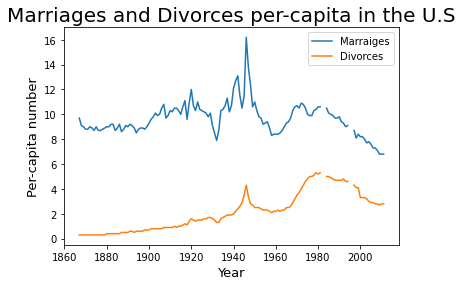

In [187]:
plt.figure()
data.plot(x = 'Year', y = ['Marriages_per_1000','Divorces_per_1000'],
label = ['Marraiges' , 'Divorces'])
plt.title('Marriages and Divorces per-capita in the U.S', color = 'Black', fontsize = 20)
plt.xlabel('Year', color = 'Black', fontsize = 13)
plt.ylabel('Per-capita number', color = 'Black', fontsize = 13)
plt.show()

# Question 7

Create a vertical bar chart comparing the number of marriages and divorces per
capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!

**Answer:**

In [188]:
data = pd.read_csv('us-marriages-divorces-1867-2014.csv')
newData = data.loc[data.Year.isin([1900,1950,2000]),['Year','Marriages_per_1000','Divorces_per_1000']]
newData.head()

,Year,Marriages_per_1000,Divorces_per_1000
33,1900,9.3,0.7
83,1950,11.0,2.5
133,2000,8.2,3.3


([<matplotlib.axis.XTick at 0x1db0791b220>,
 [Text(0, 0, '1900'), Text(1, 0, '1950'), Text(2, 0, '2000')])

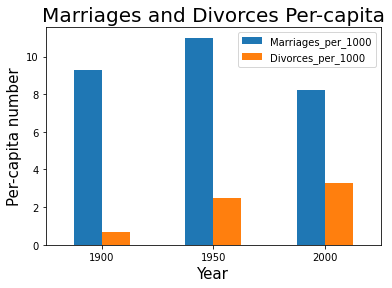

In [191]:
newData[{'Marriages_per_1000','Divorces_per_1000'}].plot.bar()
plt.title("Marriages and Divorces Per-capita", color = 'Black', fontsize = 20)
plt.xlabel('Year', color = 'Black', fontsize = 15)
plt.ylabel('Per-capita number', color = 'Black', fontsize = 15)
positions = (0,1,2)
labels = ("1900", "1950", "2000")
plt.xticks(positions, labels, rotation = 0)

# Question 8

Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort
the actors by their kill count and label each bar with the corresponding actor's name.
Don't forget to label your axes!

**Answer:**

In [192]:
data = pd.read_csv('actor_kill_counts.csv')
newData = data.sort_values("Count", ascending = True)

Text(0, 0.5, 'Actor')

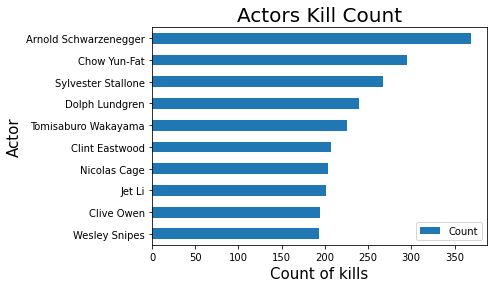

In [196]:
newData.plot.barh(x='Actor', y='Count')
plt.title('Actors Kill Count', fontsize=20, color = 'Black')
plt.xlabel('Count of kills', color = 'Black', fontsize = 15)
plt.ylabel('Actor', color = 'Black', fontsize = 15)

# Question 9

Create a pie chart showing the fraction of all Roman Emperors that were
assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the
percentage breakdown of the categories.

**Answer:**

In [198]:
data = pd.read_csv('roman-emperor-reigns.csv')
data.head()

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide


In [199]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [200]:
newdata = data.groupby("Cause_of_Death")['Emperor'].count()

Text(0.5, 1.0, "Roman Emperor's Cause of Death")

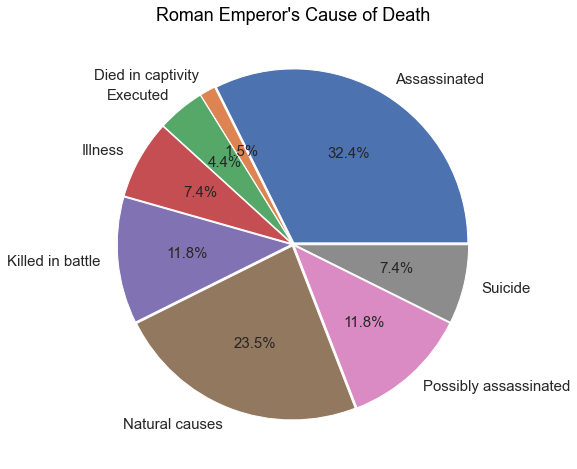

In [202]:
newdata.plot.pie(autopct="%.1f%%", figsize = (8,8) , fontsize = 15, ylabel = '', explode=[0.01]*8)
plt.title("Roman Emperor's Cause of Death", color = 'Black', fontsize = 18)

# Question 10.

Create a scatter plot showing the relationship between the total revenue earned by
arcades and the number of Computer Science PhDs awarded in the U.S. between
2000 and 2009.
Don't forget to label your axes!
Color each dot according to its year


**Answer:**

In [204]:
import pandas as pd
df = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv', index_col=0)
df.head()

,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
Year,,
2000,1.196,861
2001,1.176,830
2002,1.269,809
2003,1.240,867
2004,1.307,948


<AxesSubplot:xlabel='Total Arcade Revenue (billions)', ylabel='Computer Science Doctorates Awarded (US)'>

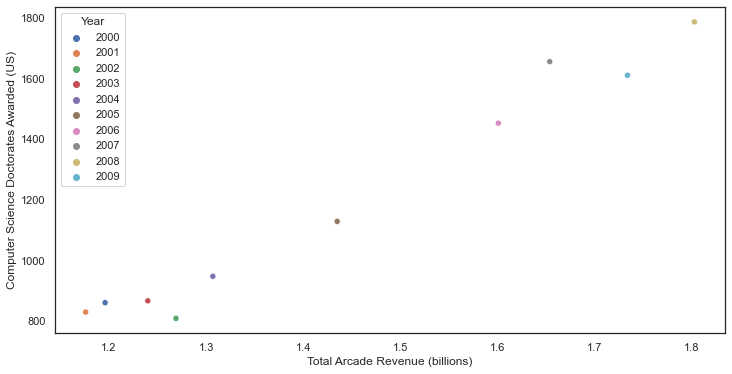

In [213]:
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc = {'figure.figsize':(12,6)})
sns.set_theme(style="white")
sns.scatterplot(x='Total Arcade Revenue (billions)', y='Computer Science Doctorates Awarded (US)', 
                hue='Year', data=df, palette="deep")